<a href="https://colab.research.google.com/github/Manlikemurph/monkeys/blob/master/Monkeys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai import *
from fastai.vision import *
from fastai.core import *

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = '/content/drive/My Drive/fastai/Monkey Faces'

In [22]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  5 classes:
 ['Chimpanzee', 'Mandrill', 'Macaque', 'Gorilla', 'Orungatun']


In [0]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

In [24]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 214 training images and 53 validation images.


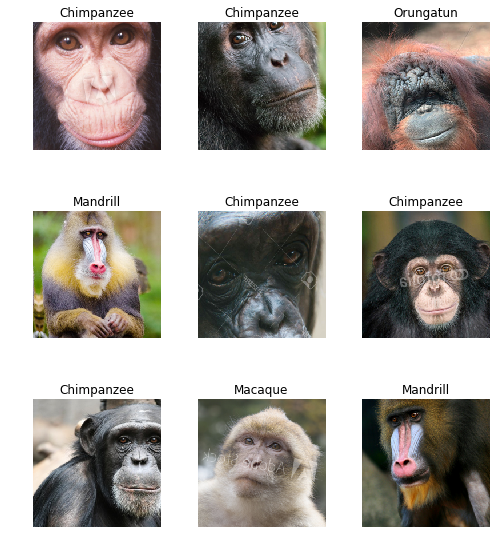

In [25]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [27]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.917315,0.895311,0.698113,00:11
1,1.203777,0.232395,1.000000,00:11
2,0.846724,0.135935,1.000000,00:11


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

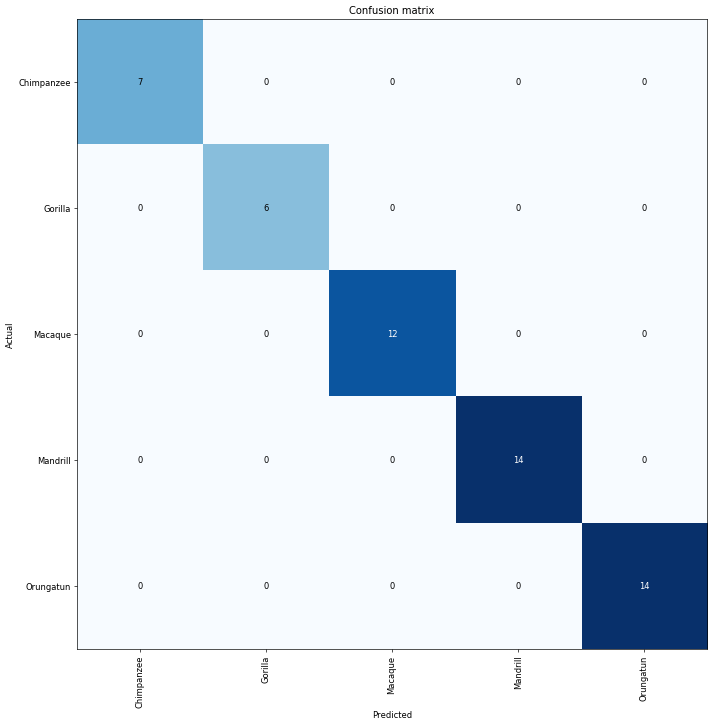

In [29]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

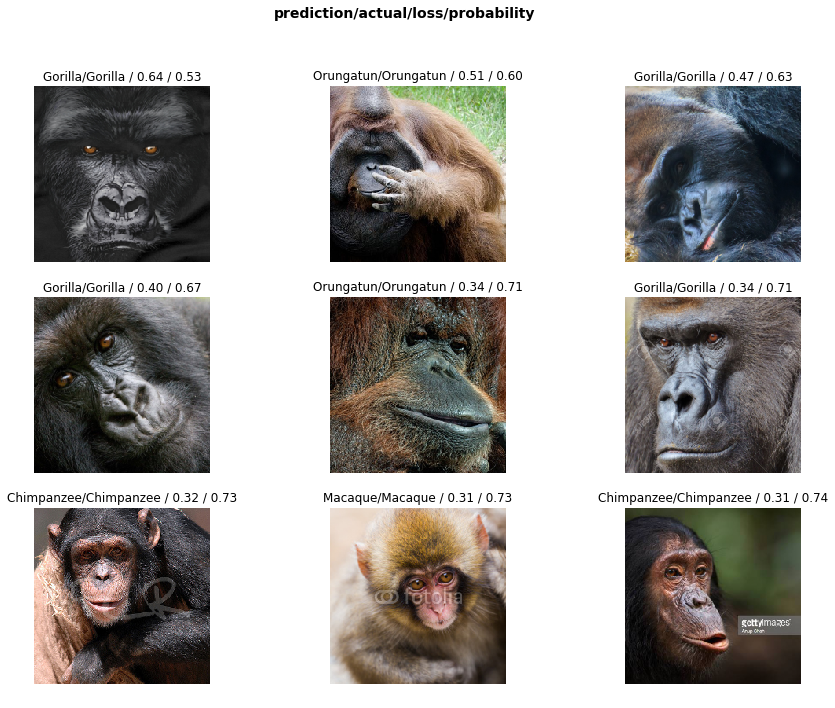

In [30]:

interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [3]:
filename = '/content/drive/My Drive/fastai/Test/wheat.jpg'
img = open_image(filename)
img

NameError: ignored

In [44]:
wheat

It is a Macaque
